In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Earthquakes_database.csv')

In [2]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

df['DateTime'] = df['Date'] + pd.to_timedelta(df['Time'].dt.strftime('%H:%M:%S'))

df.drop(['Date', 'Time'], axis=1, inplace=True)

print("Number of NaT values in DateTime column:", df['DateTime'].isnull().sum())

df.head()

Number of NaT values in DateTime column: 3


,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime
0,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50


In [4]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,DateTime
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000,23409
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784,1993-02-18 12:19:39.880815104
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000,1965-01-02 13:44:18
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000,1981-04-11 05:29:33
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000,1993-11-30 20:44:13
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000,2005-09-09 19:55:22
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000,2016-12-30 20:08:28
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545,NaN


In [6]:
df['Depth'] = pd.to_numeric(df['Depth'], errors='coerce')

depth_bins = [0, 10, 20, 30, 40, float('inf')]
depth_labels = ['Very Shallow', 'Shallow', 'Intermediate', 'Deep', 'Very Deep']

df['DepthCategory'] = pd.cut(df['Depth'], bins=depth_bins, labels=depth_labels)

In [7]:
print("Distribution of DepthCategory:")
df['DepthCategory'].value_counts()

Distribution of DepthCategory:


DepthCategory
Very Deep       7604
Deep            5928
Very Shallow    4753
Shallow         2559
Intermediate    2395
Name: count, dtype: int64

In [8]:
df.columns

Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status', 'DateTime',
       'DepthCategory'],
      dtype='object')

In [9]:
melted_df = pd.melt(df, id_vars=['ID', 'DateTime'], value_vars=['Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type'])

In [10]:
melted_df

,ID,DateTime,variable,value
0,ISCGEM860706,1965-01-02 13:44:18,Latitude,19.246
1,ISCGEM860737,1965-01-04 11:29:49,Latitude,1.863
2,ISCGEM860762,1965-01-05 18:05:58,Latitude,-20.579
3,ISCGEM860856,1965-01-08 18:49:43,Latitude,-59.076
4,ISCGEM860890,1965-01-09 13:32:50,Latitude,11.938
...,...,...,...,...
140467,NN00570710,2016-12-28 08:22:12,Magnitude Type,ML
140468,NN00570744,2016-12-28 09:13:47,Magnitude Type,ML
140469,US10007NAF,2016-12-28 12:38:51,Magnitude Type,MWW
140470,US10007NL0,2016-12-29 22:30:19,Magnitude Type,MWW


In [11]:
pivot_df = pd.pivot_table(df, index='Type', columns='Magnitude Type', values='Magnitude', aggfunc='mean')

In [12]:
pivot_df

Magnitude Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Type,,,,,,,,,,
Earthquake,5.674541,5.966667,6.54,5.842462,5.99436,5.933794,5.907282,5.858116,5.630769,6.008674
Explosion,5.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nuclear Explosion,5.864417,NaN,NaN,5.664167,NaN,NaN,NaN,NaN,NaN,NaN
Rock Burst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.200000,NaN,NaN


In [14]:
import matplotlib.pyplot as plt

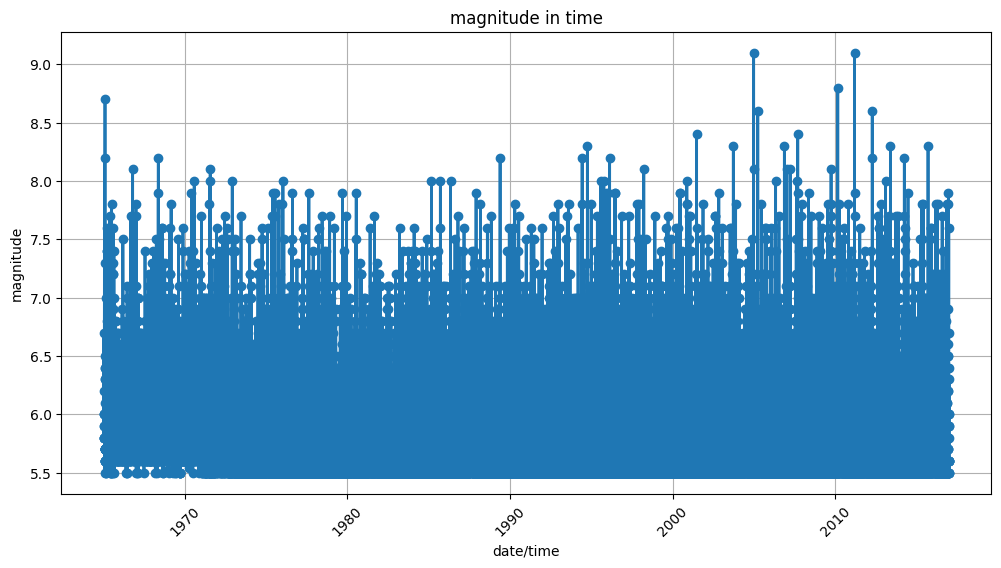

In [15]:
# linear
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Magnitude'], linewidth=2, marker='o')
plt.xlabel('date/time')
plt.ylabel('magnitude')
plt.title('magnitude in time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

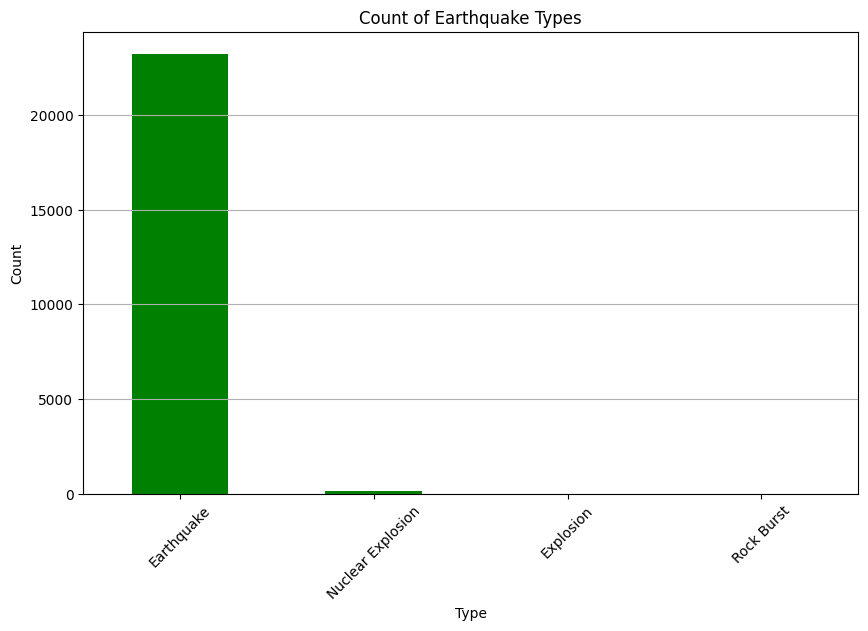

In [16]:
# Bar Chart
plt.figure(figsize=(10, 6))
df['Type'].value_counts().plot(kind='bar', color='green')
plt.title('Count of Earthquake Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

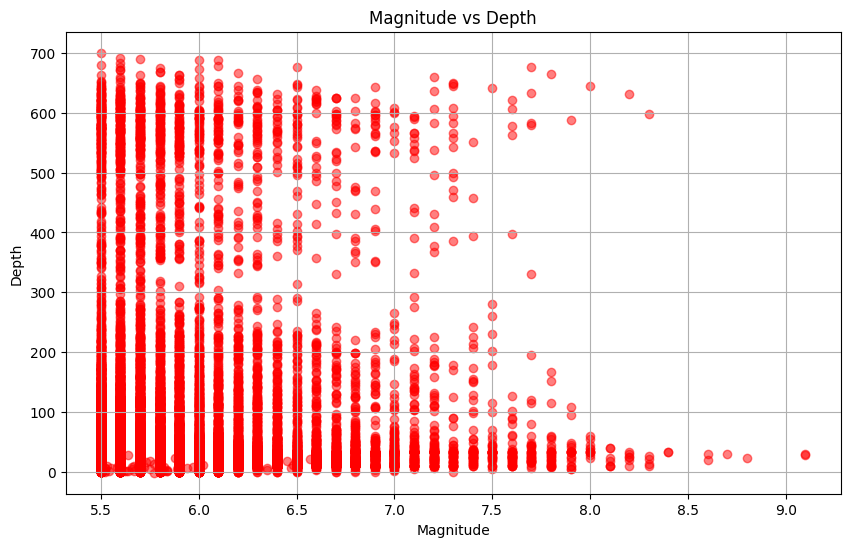

In [17]:
# Scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['Magnitude'], df['Depth'], color='red', alpha=0.5)
plt.title('Magnitude vs Depth')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.grid(True)
plt.show()

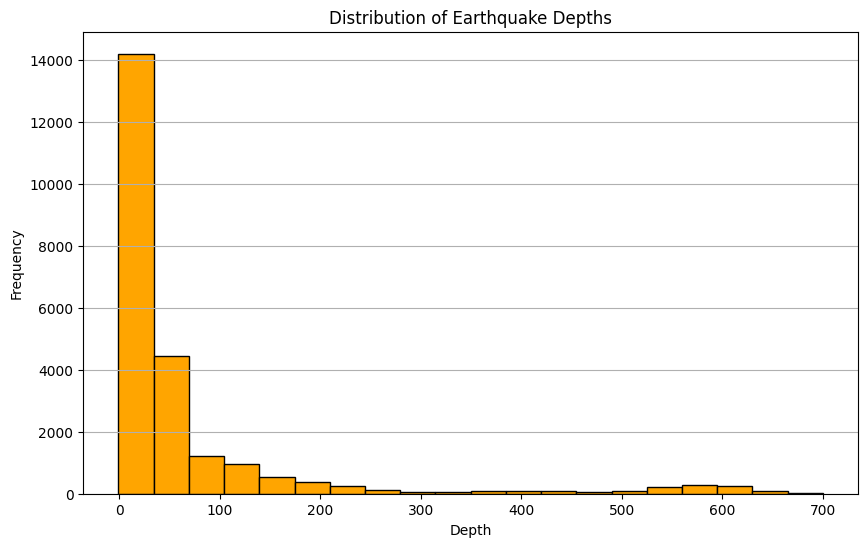

In [18]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Depth'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [20]:
df.head()

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime,DepthCategory
0,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18,Very Deep
1,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49,Very Deep
2,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58,Shallow
3,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43,Shallow
4,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50,Shallow


In [21]:
df.dropna(subset=['DateTime'], inplace=True)

df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day

monthly_resampled = df.set_index('DateTime').resample('M')['Magnitude'].mean()

# Display the resampled data
monthly_resampled.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6860\4096982089.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resampled = df.set_index('DateTime').resample('M')['Magnitude'].mean()


DateTime
1965-01-31    6.123077
1965-02-28    5.955556
1965-03-31    6.057895
1965-04-30    5.945455
1965-05-31    5.954545
Freq: ME, Name: Magnitude, dtype: float64